<img src="https://lms.ebaconline.com.br/_nuxt/img/ebac-logo.8292196.svg" alt="ebac-logo">

---

# **Profissão: Cientista de Dados**
### **Módulo 8** | Git / GitHub - Controle de versionamento | Exercício 3

**Aluno:** [Ademar maciano de abreu Junior](https://www.linkedin.com/in/adjunioranalistabi)<br>
**Data de entrega:** 22 de Abril de 2024.<br>


---

# <div style="text-align:center"> Projeto 01 - Concessão de cartões de crédito </div>

## Índice <a name="Contents"></a>

- [Etapa 1 CRISP - DM: Entendimento do negócio](#1)
- [Etapa 2 & 3 Crisp-DM: Entendimento e preparação dos dados](#2e3)
    > - [Import das bibliotecas/pacotes](#import)
    > - [Leitura e pré-processamento dos dados](#leitura)
    > - [Entendimento dos dados - Análise univariada](#univariada)
    >> - [Gráficos de barras](#barras)
    >> - [Histogramas](#histogramas)
    > - [Entendimento dos dados - Análise bivariada](#bivariada)
    > - [Quantidade de categorias por variável](#qtd_categorias)
    > - [Conversão das variáveis categóricas em variáveis numéricas (dummies)](#dummies)
- [Etapa 4 e 5 Crisp-DM: Modelagem & Avaliação dos resultados](#4e5)
    > - [Dividindo a base em treino e teste](#train_test_split)
    > - [RandomForestClassifier](#RFC)
    > - [DecisionTreeClassifier #1](#DTC1)
    > - [DecisionTreeClassifier #2](#DTC2)



---

## Etapa 1 CRISP - DM: Entendimento do negócio <a name="1"></a>

**Este é um problema de concessão de cartões de crédito**, publicado no [Kaggle](https://www.kaggle.com/), uma plataforma que promove desafios de ciência de dados, oferecendo prêmios em dinheiro para os melhores colocados. O link original está [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).  
  
Essa é uma base de proponentes de cartão de crédito. **O objetivo é construir um modelo preditivo para identificar o risco de inadimplência** (tipicamente definida pela ocorrência de um atraso maior ou igual a 90 em um horizonte de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).

Atividades do CRISP-DM:

- Objetivos do negócio
> Note que o objetivo aqui é que o modelo sirva o mutuário (o cliente) para que avalie suas próprias decisões, e não a instituição de crédito.
- Objetivos da modelagem
> O objetivo está bem definido: desenvolver o melhor modelo preditivo de modo a auxiliar o mutuário a tomar suas próprias decisões referentes a crédito.

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

---

## Etapa 2 & 3 Crisp-DM: Entendimento e preparação dos dados <a name="2e3"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

### Dicionário de dados

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |inteiro|
| tempo de emprego | tempo de emprego em anos |inteiro|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
| **mau** | indicadora de mau pagador (True = mau, False = bom) |binária|





### Import das bibliotecas/pacotes <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn import metrics


from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

%matplotlib inline

### Leitura e pré-processamento dos dados <a name="leitura"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
df = pd.read_csv('dados_limpos.csv')

print('Quantidade de linhas e colunas do dataframe:\n',
      df.shape[0], 'linhas \n',
      df.shape[1], 'colunas \n'
     )

print('Quantidade de linhas duplicadas:',
      df.duplicated().sum())

df.drop_duplicates(inplace=True)

print('Quantidade de linhas após remoção:',
      len(df), '\n')

df.reset_index(drop=True, inplace=True)

print(df.info())

df

Quantidade de linhas e colunas do dataframe:
 16650 linhas 
 30 colunas 

Quantidade de linhas duplicadas: 0
Quantidade de linhas após remoção: 16650 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              16650 non-null  int64  
 1   qtd_filhos                              16650 non-null  int64  
 2   idade                                   16650 non-null  float64
 3   tempo_emprego                           16650 non-null  float64
 4   possui_celular                          16650 non-null  int64  
 5   possui_fone_comercial                   16650 non-null  int64  
 6   possui_fone                             16650 non-null  int64  
 7   possui_email                            16650 non-null  int64  
 8   qt_pessoas_residencia                   1665

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,False,...,1,1,0,0,0,1,0,0,0,0
1,1,0,52.356164,8.358904,1,0,1,1,1.0,False,...,1,0,0,1,0,1,0,0,0,0
2,2,0,52.356164,8.358904,1,0,1,1,1.0,False,...,1,0,0,1,0,1,0,0,0,0
3,3,0,46.224658,2.106849,1,1,1,1,2.0,False,...,0,1,0,0,0,1,0,0,0,0
4,4,0,29.230137,3.021918,1,0,0,0,2.0,False,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,16645,0,54.109589,9.884932,1,0,0,0,2.0,True,...,1,0,0,0,0,1,0,0,0,0
16646,16646,0,43.389041,7.380822,1,1,1,0,2.0,True,...,1,1,0,0,0,1,0,0,0,0
16647,16647,0,30.005479,9.800000,1,1,0,0,2.0,True,...,1,1,0,0,0,1,0,0,0,0
16648,16648,0,30.005479,9.800000,1,1,0,0,2.0,True,...,1,1,0,0,0,1,0,0,0,0


### Entendimento dos dados - Análise univariada <a name="univariada"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

Distribuição da variável resposta (mau):
mau
Adimplentes      16260
Inadimplentes      390
Name: count, dtype: int64

Distribuição percentual da variável resposta (mau):
mau
Adimplentes      97.66
Inadimplentes     2.34
Name: proportion, dtype: float64


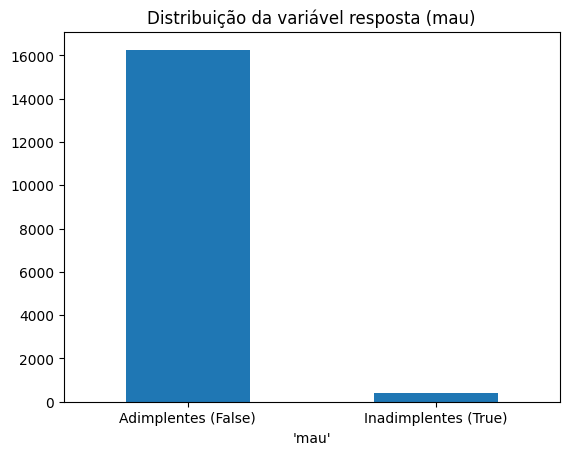

In [3]:
print('Distribuição da variável resposta (mau):')
print(df.mau.value_counts().rename(
    {False: 'Adimplentes',
     True: 'Inadimplentes'}))

print('\nDistribuição percentual da variável resposta (mau):')
print(round(df.mau.value_counts(normalize=True).rename(
    {False: 'Adimplentes',
     True: 'Inadimplentes'}) * 100, 2))

df['mau'].value_counts().plot.bar(rot=0)
plt.title(label='Distribuição da variável resposta (mau)')
plt.xlabel(xlabel="'mau'")
plt.xticks(ticks=[0,1],
           labels=['Adimplentes (False)', 'Inadimplentes (True)'])
plt.show()

#### Gráficos de barras <a name="barras"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

posse_de_veiculo_Y
0    10178
1     6472
Name: count, dtype: int64


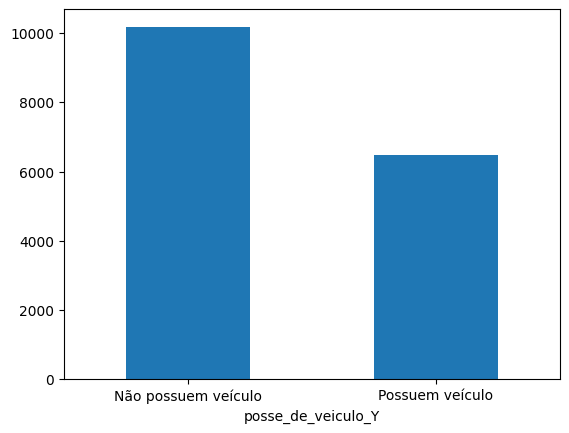

In [5]:
print(df['posse_de_veiculo_Y'].value_counts())

df['posse_de_veiculo_Y'].value_counts().plot.bar(rot=0)
plt.xticks(ticks=[0,1],
           labels=['Não possuem veículo', 'Possuem veículo'])
plt.show()

posse_de_imovel_Y
1    11176
0     5474
Name: count, dtype: int64


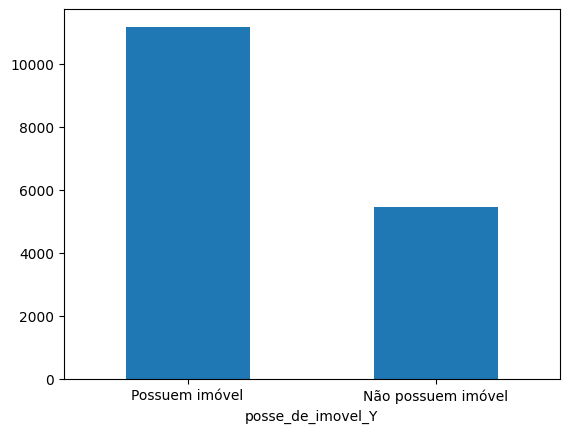

In [6]:
print(df['posse_de_imovel_Y'].value_counts())

df['posse_de_imovel_Y'].value_counts().plot.bar(rot=0)
plt.xticks(ticks=[0,1],
           labels=['Possuem imóvel', 'Não possuem imóvel'])
plt.show()

#### Histogramas <a name="histogramas"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

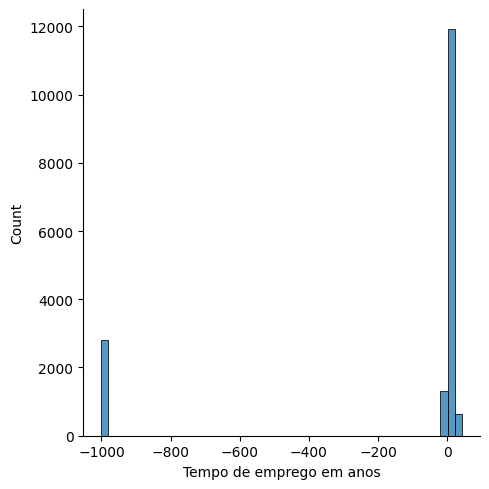

In [7]:
sns.displot(data=df,
            x="tempo_emprego",
            bins=50)
plt.xlabel('Tempo de emprego em anos')
plt.show()

#### Alterando valores de -1000 pra -2, para melhor visualização no gráfico:

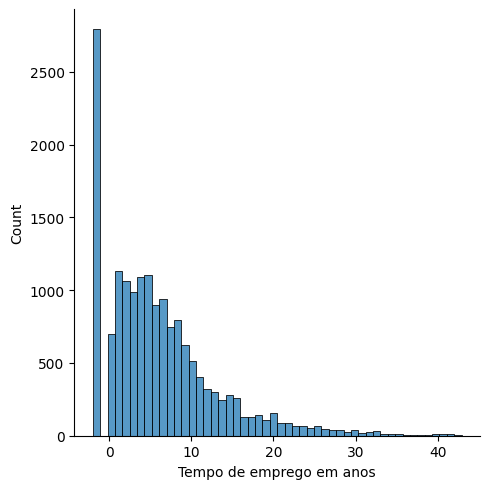

In [8]:
df.loc[df["tempo_emprego"]<0, "tempo_emprego"] = -2

sns.displot(data=df,
            x="tempo_emprego",
            bins = 50)
plt.xlabel('Tempo de emprego em anos')
plt.show()

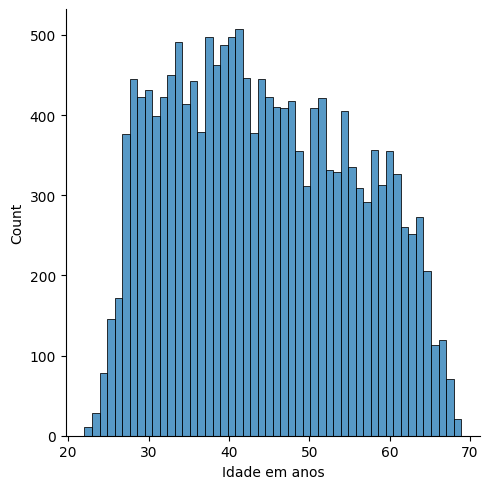

In [9]:
sns.displot(data=df,
            x="idade",
            bins=50)
plt.xlabel('Idade em anos')
plt.show()

### Entendimento dos dados - Análise bivariada <a name="bivariada"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

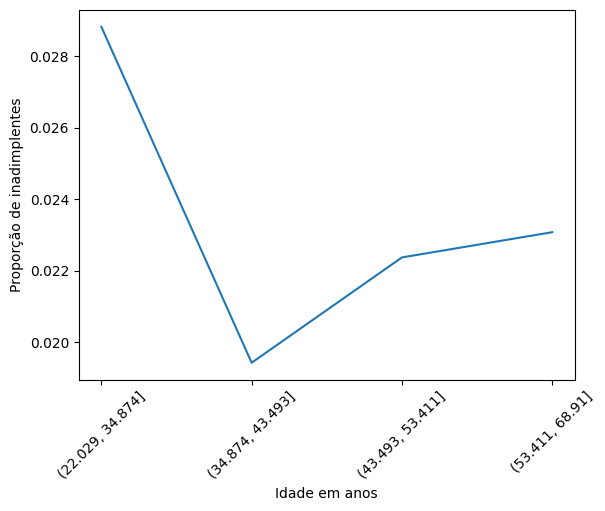

In [10]:
cat_srs, bins = pd.qcut(x=df['idade'],
                        q=4,
                        retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_xlabel(xlabel='Idade em anos')
ax.set_ylabel(ylabel="Proporção de inadimplentes")
ticks = plt.xticks(ticks=range(len(biv.index.values)),
                   labels=biv.index.values,
                   rotation=45)

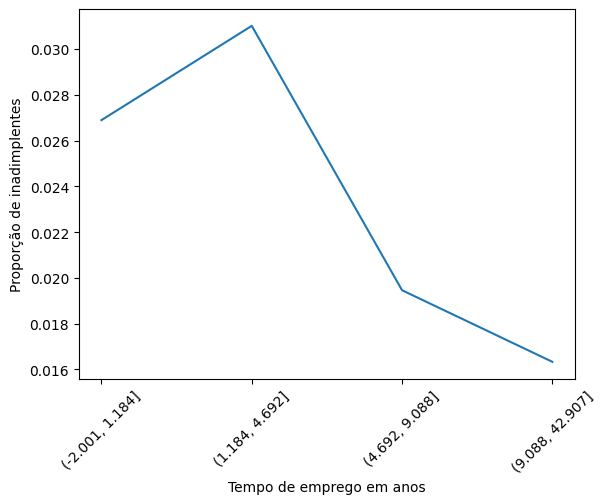

In [11]:
cat_srs, bins = pd.qcut(x=df['tempo_emprego'],
                        q=4,
                        retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_xlabel(xlabel="Tempo de emprego em anos")
ax.set_ylabel(ylabel="Proporção de inadimplentes")
ticks = plt.xticks(ticks=range(len(biv.index.values)),
                   labels=biv.index.values,
                   rotation=45)

plt.show()

---

### Quantidade de categorias por variável <a name="qtd_categorias"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [12]:
df_metadados = pd.DataFrame(data=df.dtypes)
df_metadados.columns = ['tipo_dados']

qtd_categorias = []

for coluna in df.columns:
    qtd_categorias.append(df[coluna].nunique())

df_metadados['qtd_categorias'] = qtd_categorias
df_metadados

,tipo_dados,qtd_categorias
Unnamed: 0,int64,16650
qtd_filhos,int64,8
idade,float64,5298
tempo_emprego,float64,3005
possui_celular,int64,1
possui_fone_comercial,int64,2
possui_fone,int64,2
possui_email,int64,2
qt_pessoas_residencia,float64,9
mau,bool,2


### Conversão das variáveis categóricas em variáveis numéricas (*dummies*) <a name="dummies"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [15]:
df = pd.get_dummies(data=df.copy(),
                    columns=['sexo_M', 'posse_de_veiculo_Y', 'posse_de_imovel_Y'],
                    drop_first=True)

df = pd.get_dummies(data=df)

print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              16650 non-null  int64  
 1   qtd_filhos                              16650 non-null  int64  
 2   idade                                   16650 non-null  float64
 3   tempo_emprego                           16650 non-null  float64
 4   possui_celular                          16650 non-null  int64  
 5   possui_fone_comercial                   16650 non-null  int64  
 6   possui_fone                             16650 non-null  int64  
 7   possui_email                            16650 non-null  int64  
 8   qt_pessoas_residencia                   16650 non-null  float64
 9   mau                                     16650 non-null  bool   
 10  tipo_renda_Pensioner                    16650 non-null  in

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents,sexo_M_1,posse_de_veiculo_Y_1,posse_de_imovel_Y_1
0,0,0,58.832877,3.106849,1,0,0,0,2.0,False,...,0,0,1,0,0,0,0,True,True,True
1,1,0,52.356164,8.358904,1,0,1,1,1.0,False,...,1,0,1,0,0,0,0,False,False,True
2,2,0,52.356164,8.358904,1,0,1,1,1.0,False,...,1,0,1,0,0,0,0,False,False,True
3,3,0,46.224658,2.106849,1,1,1,1,2.0,False,...,0,0,1,0,0,0,0,True,True,True
4,4,0,29.230137,3.021918,1,0,0,0,2.0,False,...,0,0,1,0,0,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,16645,0,54.109589,9.884932,1,0,0,0,2.0,True,...,0,0,1,0,0,0,0,False,False,True
16646,16646,0,43.389041,7.380822,1,1,1,0,2.0,True,...,0,0,1,0,0,0,0,False,False,True
16647,16647,0,30.005479,9.800000,1,1,0,0,2.0,True,...,0,0,1,0,0,0,0,True,True,True
16648,16648,0,30.005479,9.800000,1,1,0,0,2.0,True,...,0,0,1,0,0,0,0,True,True,True


In [16]:
df.dtypes.to_frame(name='Dtype')

,Dtype
Unnamed: 0,int64
qtd_filhos,int64
idade,float64
tempo_emprego,float64
possui_celular,int64
possui_fone_comercial,int64
possui_fone,int64
possui_email,int64
qt_pessoas_residencia,float64
mau,bool


---

## Etapa 4 e 5 Crisp-DM: Modelagem & Avaliação dos resultados <a name="4e5"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

### Dividindo a base em treino e teste <a name="train_test_split"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [17]:
# X = Variáveis explicativas:
X = df.drop(columns='mau')
print('Quantidade de linhas e colunas das variáveis explicativas (X):',
      X.shape, '\n')

# y = Variável resposta:
y = df.mau
print('Quantidade de linhas da variável resposta (y):',
      len(y), '\n\n')

# Separando a base em 70% para treinamento e 30% para validação:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=100)

print('Quantidade de linhas e colunas de X_train (70%):',
      X_train.shape)
print('Quantidade de linhas e colunas de X_test (30%):',
      X_test.shape, '\n')

print('Quantidade de linhas de y_train (70%):',
      len(y_train))
print('Quantidade de linhas de y_test (30%):',
      len(y_test))

Quantidade de linhas e colunas das variáveis explicativas (X): (16650, 29) 

Quantidade de linhas da variável resposta (y): 16650 


Quantidade de linhas e colunas de X_train (70%): (11655, 29)
Quantidade de linhas e colunas de X_test (30%): (4995, 29) 

Quantidade de linhas de y_train (70%): 11655
Quantidade de linhas de y_test (30%): 4995


### RandomForestClassifier <a name="RFC"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [18]:
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [19]:
y_pred = clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 98.30%


#### Matriz de confusão:

In [20]:
tab = pd.crosstab(index = y_pred,
                  columns = y_test)
tab

mau,False,True
row_0,,
False,4840,57
True,28,70


### DecisionTreeClassifier #1 <a name="DTC1"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [21]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X=X_train,
              y=y_train)
clf

DecisionTreeClassifier(random_state=100)

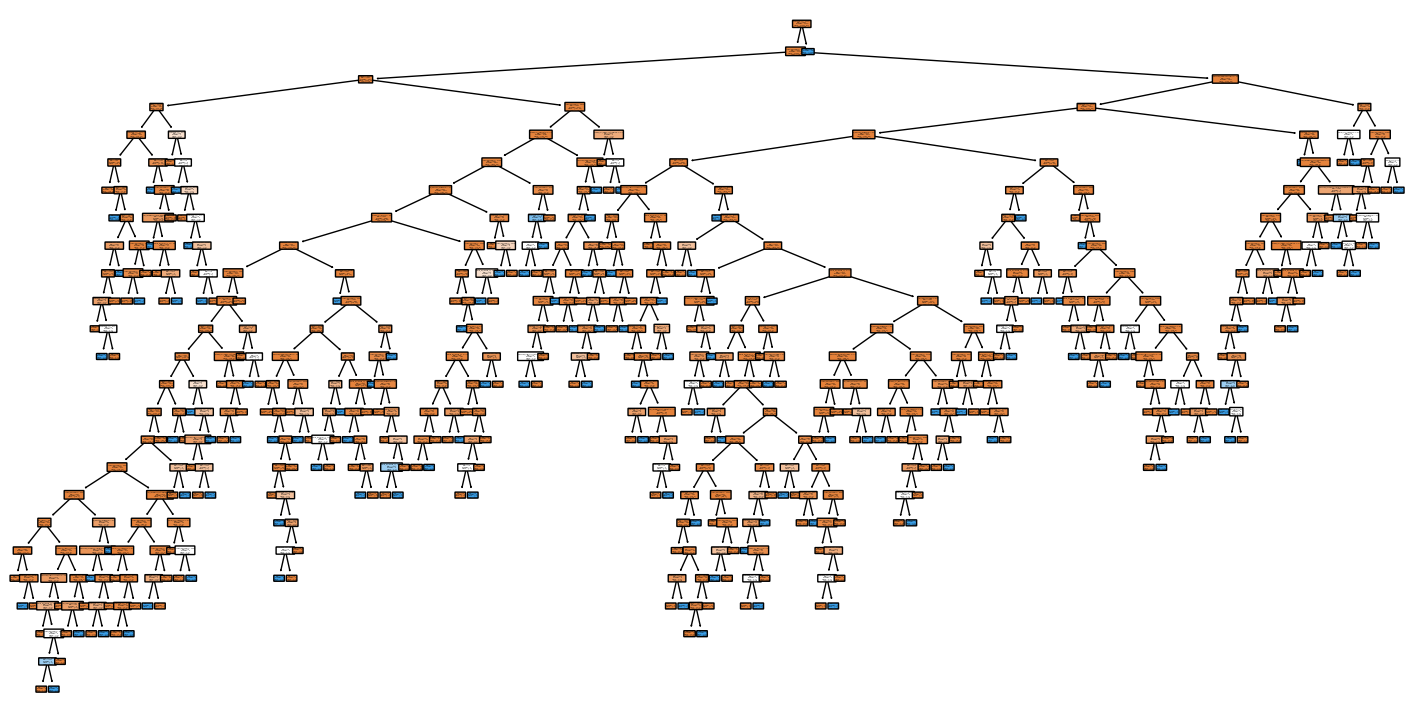

In [22]:
plt.figure(figsize=(18,9))
plot_tree(decision_tree=clf,
          feature_names=X_train.columns,
          class_names=['bons', 'maus'],
          filled=True,
          rounded=True)

plt.show()

#### Matriz de confusão para a base de treino:

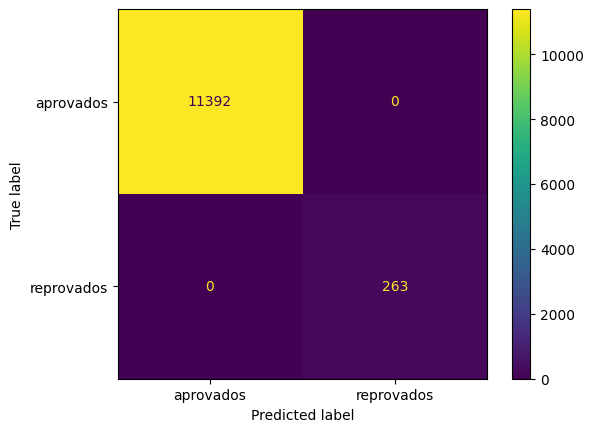

In [27]:
ConfusionMatrixDisplay.from_estimator(estimator=clf,
                                      X=X_train,
                                      y=y_train,
                                      display_labels=['aprovados', 'reprovados'])

plt.show()

#### Acurácia na base de treinamento:

In [28]:
predict_train = clf.predict(X=X_train)
accuracy_score(y_true=y_train,
               y_pred=predict_train)

1.0

In [29]:
predict_test = clf.predict(X=X_test)

print('Valores preditos:')
print(pd.Series(predict_test).value_counts(), '\n')

print('Valores reais:')
print(y_test.value_counts())

Valores preditos:
False    4875
True      120
Name: count, dtype: int64 

Valores reais:
mau
False    4868
True      127
Name: count, dtype: int64


#### Matriz de confusão para a base de teste:

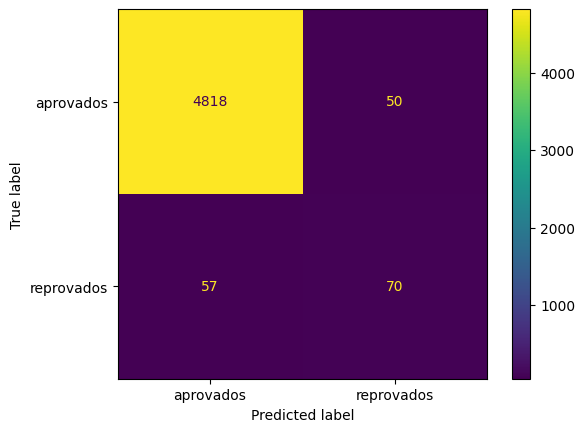

In [30]:
ConfusionMatrixDisplay.from_estimator(estimator=clf,
                                      X=X_test,
                                      y=y_test,
                                      display_labels=['aprovados', 'reprovados'])

plt.show()

#### Comparação da acurácia entre base de treinamento e base de teste:

In [31]:
print('Acurácia da base de treinamento:',
      accuracy_score(y_true=y_train,
                     y_pred=predict_train), '\n')

print('Acurácia da base de teste:',
      accuracy_score(y_true=y_test,
                     y_pred=predict_test))

Acurácia da base de treinamento: 1.0 

Acurácia da base de teste: 0.9785785785785786


### DecisionTreeClassifier #2 <a name="DTC2"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [32]:
nova_clf = DecisionTreeClassifier(max_depth=10,
                                  min_samples_leaf=5,
                                  random_state=123)
nova_clf = nova_clf.fit(X=X_train,
                        y=y_train)
nova_clf

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

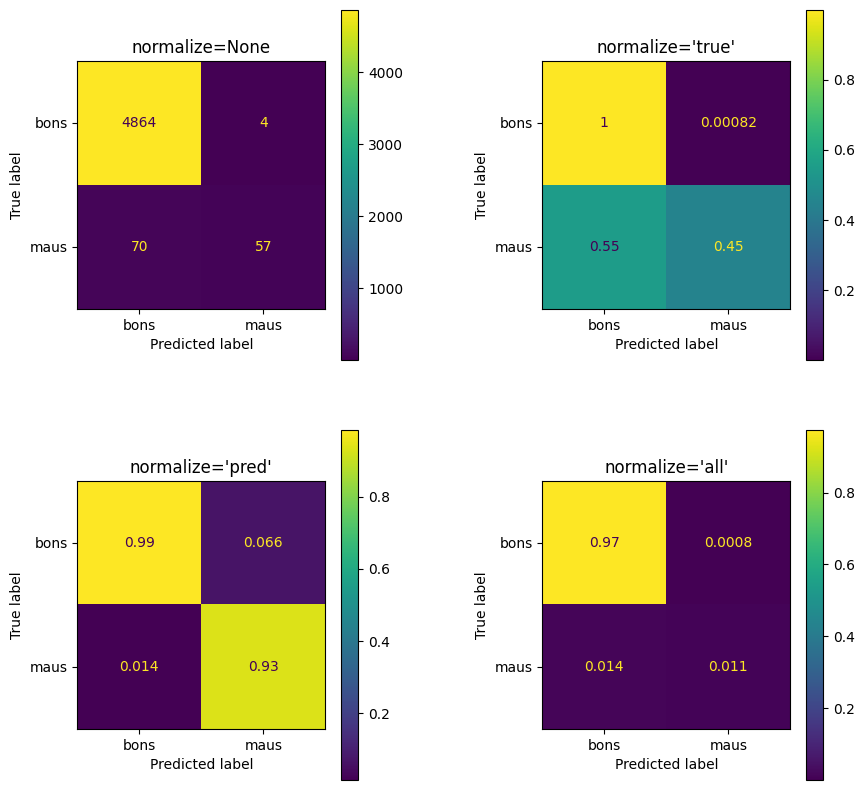

In [33]:
fig, axes = plt.subplots(nrows=2,
                         ncols=2,
                         figsize=(10,10))
fig.subplots_adjust(wspace=0.5)

ConfusionMatrixDisplay.from_estimator(estimator=nova_clf,
                                      X=X_test,
                                      y=y_test,
                                      display_labels=['bons', 'maus'],
                                      normalize=None,
                                      ax=axes[0,0])
axes[0,0].set_title(label="normalize=None")

ConfusionMatrixDisplay.from_estimator(estimator=nova_clf,
                                      X=X_test,
                                      y=y_test,
                                      display_labels=['bons', 'maus'],
                                      normalize='true',
                                      ax=axes[0,1])
axes[0,1].set_title(label="normalize='true'")

ConfusionMatrixDisplay.from_estimator(estimator=nova_clf,
                                      X=X_test,
                                      y=y_test,
                                      display_labels=['bons', 'maus'],
                                      normalize='pred',
                                      ax=axes[1,0])
axes[1,0].set_title(label="normalize='pred'")

ConfusionMatrixDisplay.from_estimator(estimator=nova_clf,
                                      X=X_test,
                                      y=y_test,
                                      display_labels=['bons', 'maus'],
                                      normalize='all',
                                      ax=axes[1,1])
axes[1,1].set_title(label="normalize='all'")

plt.show()

In [34]:
print("Proporção de proponentes classificados como 'maus':",
      round(7/(1937+87+7)*100, 2),
      '%')

Proporção de proponentes classificados como 'maus': 0.34 %


#### Acurácia caso todos os contratos fossem classificados como 'bons':

In [35]:
print("Valores reais:")
print(pd.Series(y_test).value_counts(),
      '\n')

print("Todos os contratos da base teste classificados como 'bons':")
print(pd.Series(y_test.replace(to_replace=True,
                               value=False)
               ).value_counts(),
      '\n')

print('Acurácia:',
      round(accuracy_score(y_true=y_test,
                           y_pred=y_test.replace(to_replace=True,
                                                 value=False)
                          ) * 100,
            2),
      '%')

Valores reais:
mau
False    4868
True      127
Name: count, dtype: int64 

Todos os contratos da base teste classificados como 'bons':
mau
False    4995
Name: count, dtype: int64 

Acurácia: 97.46 %


---

---